In [1]:
import torch
from Define_Model.ResNet import ThinResNet
import numpy as np
import kaldi_io
import matplotlib.pyplot as plt
import matplotlib
import os
import pickle

%matplotlib inline
plt.rc('font', family='Times New Roman')


In [2]:
x = np.arange(161) * 8000 / (161 - 1)

([], [])

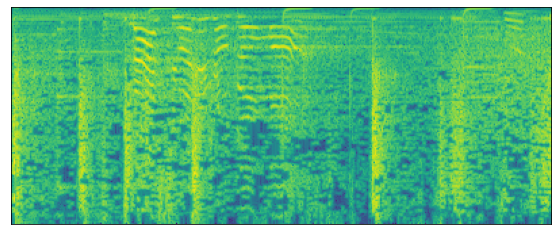

In [3]:
x1 = kaldi_io.read_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/cnceleb/klsp/klsp/dev/raw_spect_dev.1.ark:23')
# x = torch.tensor(x1).reshape(1,1,-1,161).requires_grad_()
# print("input shape: ", x.shape)
plt.figure(figsize=(12, 4))

im = plt.imshow(x1[:400].transpose())
plt.xticks([])
plt.yticks([])
# plt.colorbar(im)  # 显示颜色标尺
# print(list(in_feature_grads.keys()))
# print(list(in_feature.keys()))

In [4]:
data_dir = '/home/yangwenhao/local/project/SpeakerVerification-pytorch'
cnc_lores = 'Data/gradient/LoResNet8/cnceleb/klsp_egs_baseline/arcsoft_sgd_rop/Mean_cbam_AVG_dp25_alpha0_em256_wd5e4_var/epoch_50_var_gradient/epoch_50'
# vox1_lores = 'Data/gradient/LoResNet8/vox1/klsp_egs_baseline/arcsoft/None_cbam_em256_alpha0_dp25_wd5e4_dev_var/epoch_40_var_40/epoch_40'
vox1_lores = 'Data/gradient/LoResNet8/vox1/klsp_egs_baseline/arcsoft/None_cbam_em256_alpha0_dp25_wd5e4_dev_var/epoch_40_var2/epoch_40'

lores_female = 'Data/gradient/LoResNet8/vox1/klsp_egsfemale_baseline/arcsoft_sgd_rop/Mean_cbam_AVG_dp20_alpha0_em256_chn32_wd5e4_var/epoch_50_var/epoch_50'
lores_male = 'Data/gradient/LoResNet8/vox1/klsp_egsmale_baseline/arcsoft_sgd_rop/Mean_cbam_AVG_dp20_alpha0_em256_chn32_wd5e4_var/epoch_50_var/epoch_50'

In [5]:
pic_f = os.path.join(data_dir + cnc_lores)

with open(os.path.join(data_dir, lores_female, 'freq.data.pickle'), 'rb') as f:
    fe_data = pickle.load(f)
    
with open(os.path.join(data_dir, lores_male, 'freq.data.pickle'), 'rb') as f:
    ma_data = pickle.load(f)
    
fe_data_mean = fe_data['train.time.mean']
ma_data_mean = ma_data['train.time.mean']

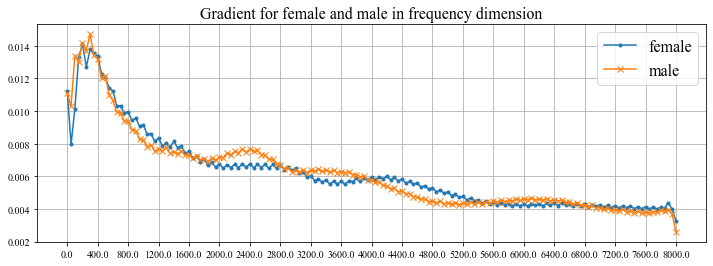

In [8]:
plt.figure(figsize=(12, 4))

plt.title('Gradient for female and male in frequency dimension', fontsize=16)

plt.plot(x, fe_data_mean/fe_data_mean.sum(), marker='.')
plt.plot(x, ma_data_mean/ma_data_mean.sum(), marker='x')

plt.grid()
xticks = np.arange(0,21)*8000/20
_ = plt.xticks(xticks, [str(s) for s in xticks])
plt.legend(["female", "male"], fontsize=16)

In [7]:
vox1_thin18 = 'Data/gradient/ThinResNet18/vox1/klsp_egs_rvec/arcsoft_sgd_rop/Mean_cbam_v2_downk5_SAP2_em256_dp01_alpha0_none1_wd5e4_var_dev/epoch_60_var_gradient/epoch_60'

In [8]:
x = np.arange(161) * 8000 / (161 - 1)

pic_f = os.path.join(data_dir + cnc_lores)

with open(os.path.join(data_dir, vox1_thin18, 'freq.data.pickle'), 'rb') as f:
    thin18_data = pickle.load(f)
    
thin18_freq = thin18_data['train.time.mean']

# plt.legend(["female", "male"]) #, fontsize=20)

In [9]:
pic_f = os.path.join(data_dir + cnc_lores)

with open(os.path.join(data_dir, cnc_lores, 'freq.data.pickle'), 'rb') as f:
    cnc_data = pickle.load(f)
    
with open(os.path.join(data_dir, vox1_lores, 'freq.data.pickle'), 'rb') as f:
    vox1_data = pickle.load(f)
    
vox1_freq = vox1_data['train.time.mean']
cnc_freq = cnc_data['train.time.mean']

In [10]:
list(cnc_data.keys())[:2]

['train.time.mean', 'train.time.var']

In [11]:
vox1_data_mean = vox1_data['train.data.mean']
cnc_data_mean = cnc_data['train.data.mean']
x = np.arange(0,161)*8000/160
# print(vox1_data_mean.shape)
# print(cnc_data_mean.shape)

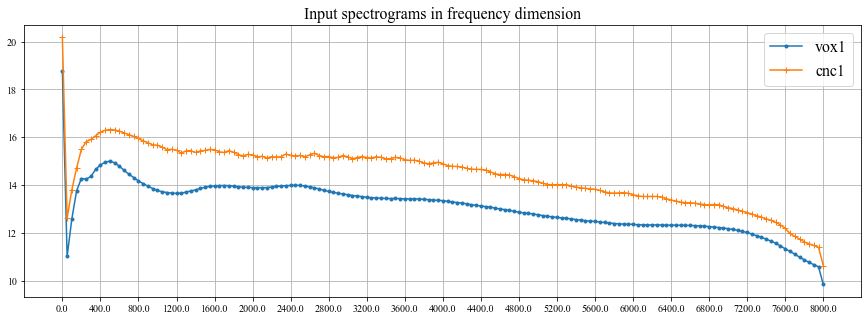

In [12]:
plt.figure(figsize=(12, 4))
plt.title('Input spectrograms in frequency dimension', fontsize=16)
plt.plot(x, vox1_data_mean, marker='.')
plt.plot(x, cnc_data_mean, marker='+')

# plt.legend(['vox1', 'cnc1'])
plt.grid()
xticks = np.arange(0,21)*8000/20
_ = plt.xticks(xticks, [str(s) for s in xticks])
plt.legend(['vox1', 'cnc1'], fontsize=16)

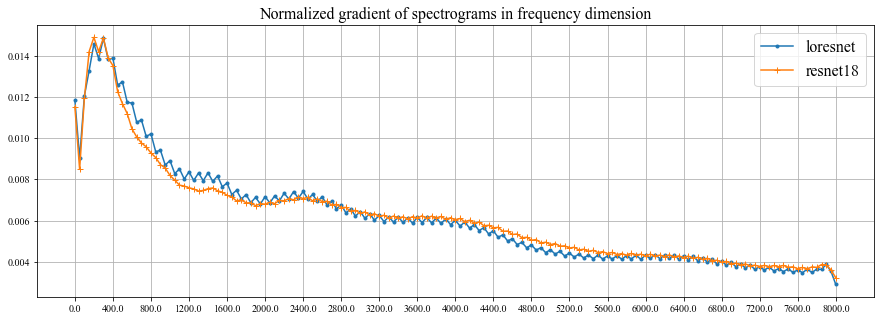

In [13]:
plt.figure(figsize=(12, 4))
# ct_tm /= ct_tm.sum()
# plt.subplot(2,1,1)
plt.title('Normalized gradient of spectrograms in frequency dimension', fontsize=16)

plt.plot(x, vox1_freq/vox1_freq.sum(), marker='.')
plt.plot(x, thin18_freq/thin18_freq.sum(), marker='+')

# plt.subplot(2,1,2)
# plt.plot(x, cnc_data_mean/cnc_data_mean.sum(), marker='+')
plt.grid()
xticks = np.arange(0,21)*8000/20
_ = plt.xticks(xticks, [str(s) for s in xticks])
plt.legend(['loresnet', 'resnet18'], fontsize=16)

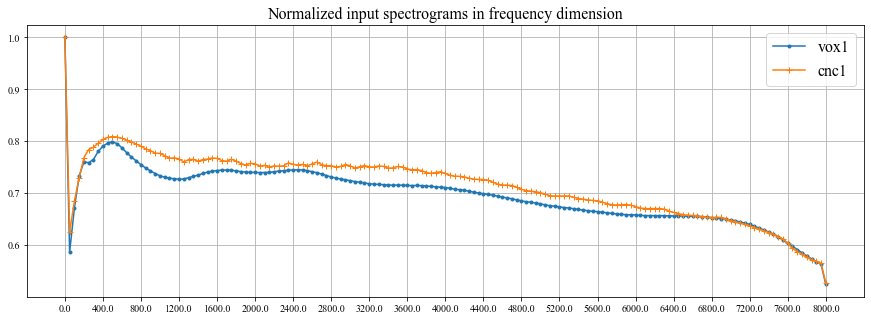

In [15]:
plt.figure(figsize=(12, 4))
plt.title('Normalized input spectrograms in frequency dimension', fontsize=16)
plt.plot(x, vox1_data_mean/vox1_data_mean.max(), marker='.')
plt.plot(x, cnc_data_mean/cnc_data_mean.max(), marker='+')

plt.grid()
xticks = np.arange(0,21)*8000/20
_ = plt.xticks(xticks, [str(s) for s in xticks])
plt.legend(['vox1', 'cnc1'], fontsize=16)